In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pyfolio as pf 

/home/liaw/anaconda3/envs/finlab/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [2]:
#Step1 Get Original Data from Interactivebroker
filename = "SPY_20040123_20200529_30min.csv" #from IB
df = pd.read_csv(filename,index_col = 0)

# df.reset_index(drop=True,inplace=True)
print(df.shape)
print(df.head(1))
print(df.tail(1))

(54688, 7)
                        open     high      low    close  volume  average  \
date                                                                       
2004-01-23 08:30:00  115.015  115.155  114.895  115.005      -1     -1.0   

                     barCount  
date                           
2004-01-23 08:30:00        -1  
                       open    high      low    close  volume  average  \
date                                                                     
2020-05-29 14:30:00  303.63  304.96  303.315  304.025      -1     -1.0   

                     barCount  
date                           
2020-05-29 14:30:00        -1  


In [3]:
print( df.info() )
print(type(df.index[0]), df.index[0])
df.index = pd.to_datetime(df.index)
print( df.info() )
print(type(df.index[0]), df.index[0])

<class 'pandas.core.frame.DataFrame'>
Index: 54688 entries, 2004-01-23 08:30:00 to 2020-05-29 14:30:00
Data columns (total 7 columns):
open        54688 non-null float64
high        54688 non-null float64
low         54688 non-null float64
close       54688 non-null float64
volume      54688 non-null int64
average     54688 non-null float64
barCount    54688 non-null int64
dtypes: float64(5), int64(2)
memory usage: 3.3+ MB
None
<class 'str'> 2004-01-23 08:30:00
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54688 entries, 2004-01-23 08:30:00 to 2020-05-29 14:30:00
Data columns (total 7 columns):
open        54688 non-null float64
high        54688 non-null float64
low         54688 non-null float64
close       54688 non-null float64
volume      54688 non-null int64
average     54688 non-null float64
barCount    54688 non-null int64
dtypes: float64(5), int64(2)
memory usage: 3.3 MB
None
<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2004-01-23 08:30:00


In [4]:
print(type(df.index[0]), df.index[0])

<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2004-01-23 08:30:00


False


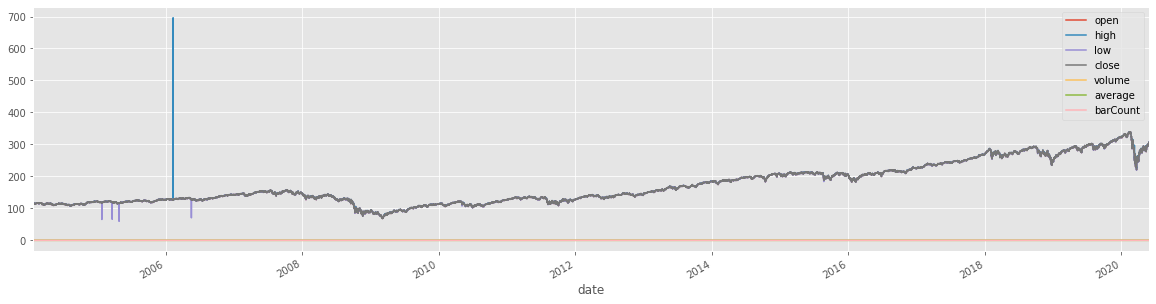

In [5]:
#Step2 check data

#Check NAN
print(df.isnull().values.any() )

#check Outlier
plt.style.use("ggplot")
plt.rcParams["figure.figsize"]=(20,5)
df.plot()

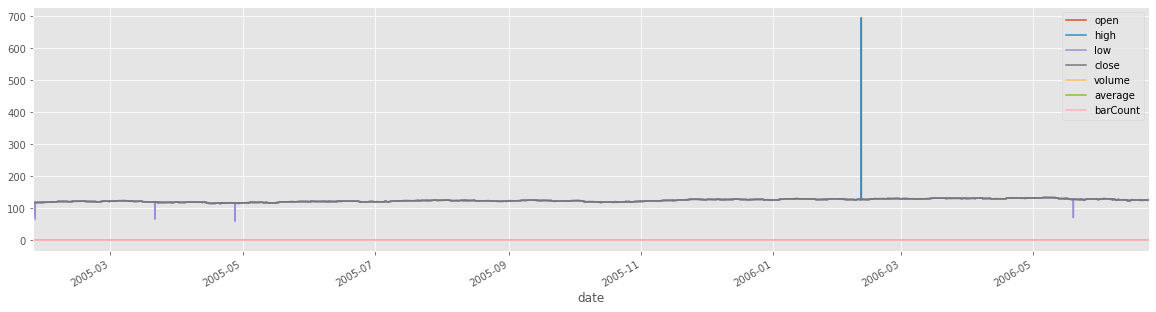

In [6]:
#Step3 Clean data
df["2005-01-23 08:30:00":"2006-06-23 08:30:00"].plot()

In [7]:
print(df["2005-01-24 15:00:00":"2005-01-25 09:00:00"].low)
#2005-01-24 15:00:00    116.400
# 2005-01-25 08:30:00     64.270
# 2005-01-25 09:00:00    117.155
print( type(df["low"]["2005-01-24 15:00:00"]) )
df.loc["2005-01-25 08:30:00",'low'] = (df["low"]["2005-01-24 15:00:00"]+df["low"]["2005-01-25 09:00:00"])/2
print(df["2005-01-24 15:00:00":"2005-01-25 09:00:00"].low)

date
2005-01-24 15:00:00    116.400
2005-01-25 08:30:00     64.270
2005-01-25 09:00:00    117.155
Name: low, dtype: float64
<class 'numpy.float64'>
date
2005-01-24 15:00:00    116.4000
2005-01-25 08:30:00    116.7775
2005-01-25 09:00:00    117.1550
Name: low, dtype: float64


In [8]:
print(df["2005-03-21 12:30:00":"2005-03-21 13:30:00"].low)

# 2005-03-21 12:30:00    118.205
# 2005-03-21 13:00:00     64.965
# 2005-03-21 13:30:00    118.165

df.loc["2005-03-21 13:00:00",'low'] = (df["low"]["2005-03-21 12:30:00"] + df["low"]["2005-03-21 13:30:00"])/2
print(df["2005-03-21 12:30:00":"2005-03-21 13:30:00"].low)


date
2005-03-21 12:30:00    118.205
2005-03-21 13:00:00     64.965
2005-03-21 13:30:00    118.165
Name: low, dtype: float64
date
2005-03-21 12:30:00    118.205
2005-03-21 13:00:00    118.185
2005-03-21 13:30:00    118.165
Name: low, dtype: float64


In [9]:
print(df["2005-04-27 12:00:00":"2005-04-27 13:00:00"].low)
# 2005-04-27 12:00:00    115.555
# 2005-04-27 12:30:00     58.585
# 2005-04-27 13:00:00    115.640
df.loc["2005-04-27 12:30:00",'low'] = (df["low"]["2005-04-27 12:00:00"] + df["low"]["2005-04-27 13:00:00"])/2
print(df["2005-04-27 12:00:00":"2005-04-27 13:00:00"].low)


date
2005-04-27 12:00:00    115.555
2005-04-27 12:30:00     58.585
2005-04-27 13:00:00    115.640
Name: low, dtype: float64
date
2005-04-27 12:00:00    115.5550
2005-04-27 12:30:00    115.5975
2005-04-27 13:00:00    115.6400
Name: low, dtype: float64


In [10]:
print(df["2006-05-19 09:30:00":"2006-05-19 10:30:00"].low)
# 2006-05-19 09:30:00    126.505
# 2006-05-19 10:00:00     69.410
# 2006-05-19 10:30:00    126.070

df.loc["2006-05-19 10:00:00",'low'] = (df["low"]["2006-05-19 09:30:00"] + df["low"]["2006-05-19 10:30:00"])/2
print(df["2006-05-19 09:30:00":"2006-05-19 10:30:00"].low)



date
2006-05-19 09:30:00    126.505
2006-05-19 10:00:00     69.410
2006-05-19 10:30:00    126.070
Name: low, dtype: float64
date
2006-05-19 09:30:00    126.5050
2006-05-19 10:00:00    126.2875
2006-05-19 10:30:00    126.0700
Name: low, dtype: float64


In [11]:
print(df["2006-02-10 13:00:00":"2006-02-10 14:00:00"].high)
# 2006-02-10 13:00:00    126.620
# 2006-02-10 13:30:00    696.035
# 2006-02-10 14:00:00    127.135

df.loc["2006-02-10 13:30:00",'high'] = (df["high"]["2006-02-10 13:00:00"] + df["high"]["2006-02-10 14:00:00"])/2
print(df["2006-02-10 13:00:00":"2006-02-10 14:00:00"].high)


date
2006-02-10 13:00:00    126.620
2006-02-10 13:30:00    696.035
2006-02-10 14:00:00    127.135
Name: high, dtype: float64
date
2006-02-10 13:00:00    126.6200
2006-02-10 13:30:00    126.8775
2006-02-10 14:00:00    127.1350
Name: high, dtype: float64


date
2004-01-23 08:30:00    115.005
2004-01-23 09:00:00    115.285
2004-01-23 09:30:00    114.955
2004-01-23 10:00:00    114.855
2004-01-23 10:30:00    114.965
2004-01-23 11:00:00    114.700
2004-01-23 11:30:00    114.550
2004-01-23 12:00:00    114.530
2004-01-23 12:30:00    114.340
2004-01-23 13:00:00    114.305
2004-01-23 13:30:00    114.390
2004-01-23 14:00:00    114.025
2004-01-23 14:30:00    114.370
2004-01-23 15:00:00    114.465
2004-01-26 08:30:00    114.675
2004-01-26 09:00:00    114.470
2004-01-26 09:30:00    114.715
2004-01-26 10:00:00    114.515
2004-01-26 10:30:00    114.610
2004-01-26 11:00:00    114.695
2004-01-26 11:30:00    114.670
2004-01-26 12:00:00    114.745
2004-01-26 12:30:00    114.685
2004-01-26 13:00:00    115.100
2004-01-26 13:30:00    115.315
2004-01-26 14:00:00    115.645
2004-01-26 14:30:00    115.815
2004-01-26 15:00:00    115.880
2004-01-27 09:00:00    115.730
2004-01-27 09:30:00    115.605
                        ...   
2020-05-27 13:00:00    301.215
202

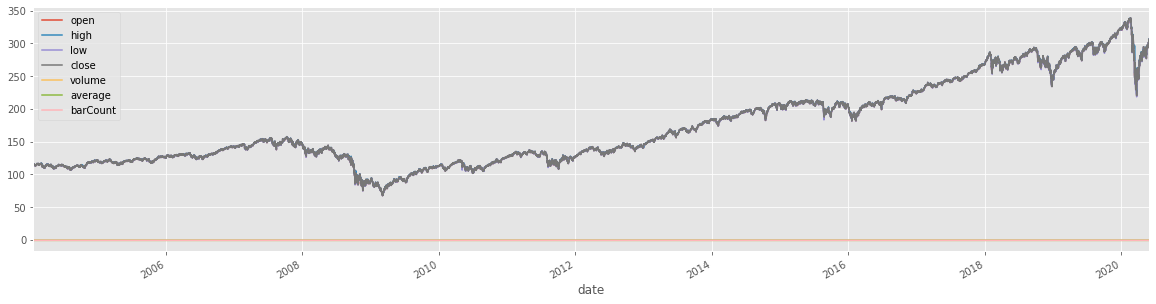

In [12]:
tc=df.close#targetclose
print(tc)
plt.style.use("ggplot")
plt.rcParams["figure.figsize"]=(20,5)
df.plot()

In [13]:
print(type(tc[1:].index[0]),tc[1:].index[0])

<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2004-01-23 09:00:00


In [14]:
print(tc[:2])

date
2004-01-23 08:30:00    115.005
2004-01-23 09:00:00    115.285
Name: close, dtype: float64


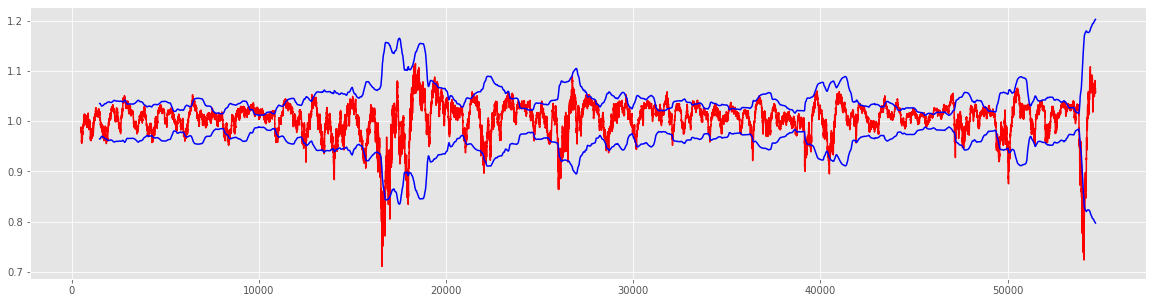

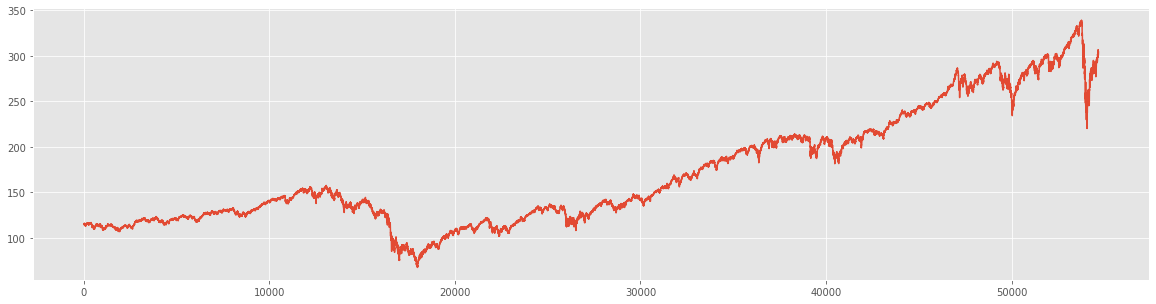

In [15]:
#Step4 MA Strategy
n_bars = 500
n_up_bars=1000
n_dn_bars=1000

sma = tc.rolling(n_bars).mean()
bias = tc / sma
ub =1+ bias.rolling(n_up_bars).std() * 2
lb = 1 - bias.rolling(n_dn_bars).std() * 2

import matplotlib.pyplot as plt

plt.plot(bias.values,c='red')
plt.plot(ub.values,c='blue')
plt.plot(lb.values,c='blue')

plt.show()
plt.plot(tc.values)

<class 'pandas.core.series.Series'>
transaction times: 530


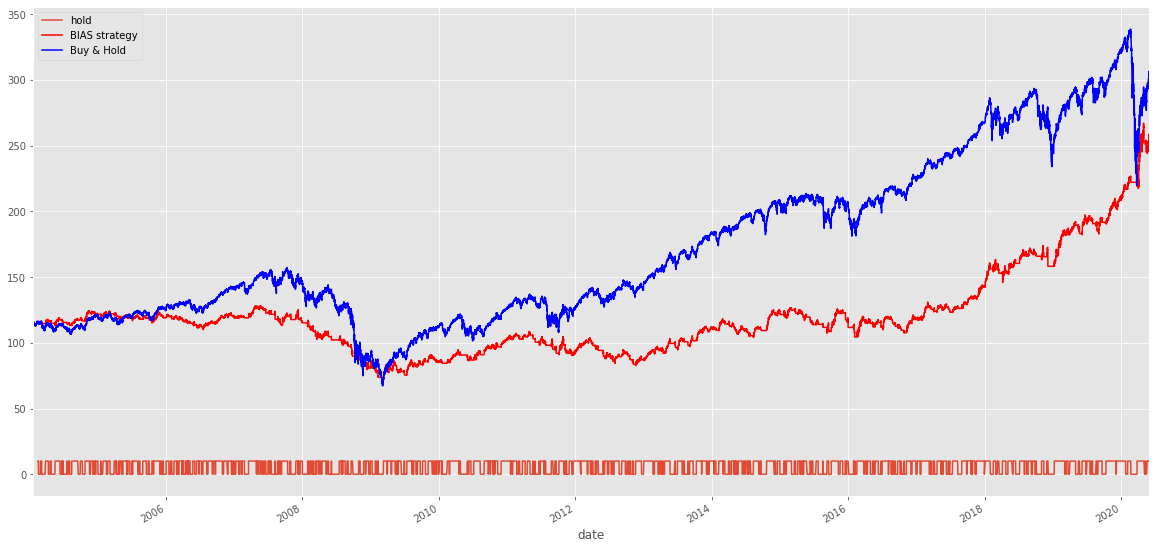

eqpc date
2004-01-23 09:00:00   -0.002862
2004-01-23 09:30:00   -0.000870
Name: close, dtype: float64


Start date,2004-01-23
End date,2020-05-29
Total months,2604
,Backtest
Annual return,0.4%
Cumulative returns,122.9%
Annual volatility,3.7%
Sharpe ratio,0.12
Calmar ratio,0.01
Stability,0.26
Max drawdown,-43.6%


/home/liaw/anaconda3/envs/finlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,43.55,2007-05-23,2009-03-11,2017-02-28,2550
1,11.61,2004-11-17,2006-07-21,2007-04-13,628
2,10.68,2018-02-27,2018-04-06,2018-06-13,77
3,9.05,2018-11-08,2018-12-04,2019-01-31,61
4,8.64,2020-04-29,2020-05-19,NaT,NaN


/home/liaw/anaconda3/envs/finlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


141.19999999999982

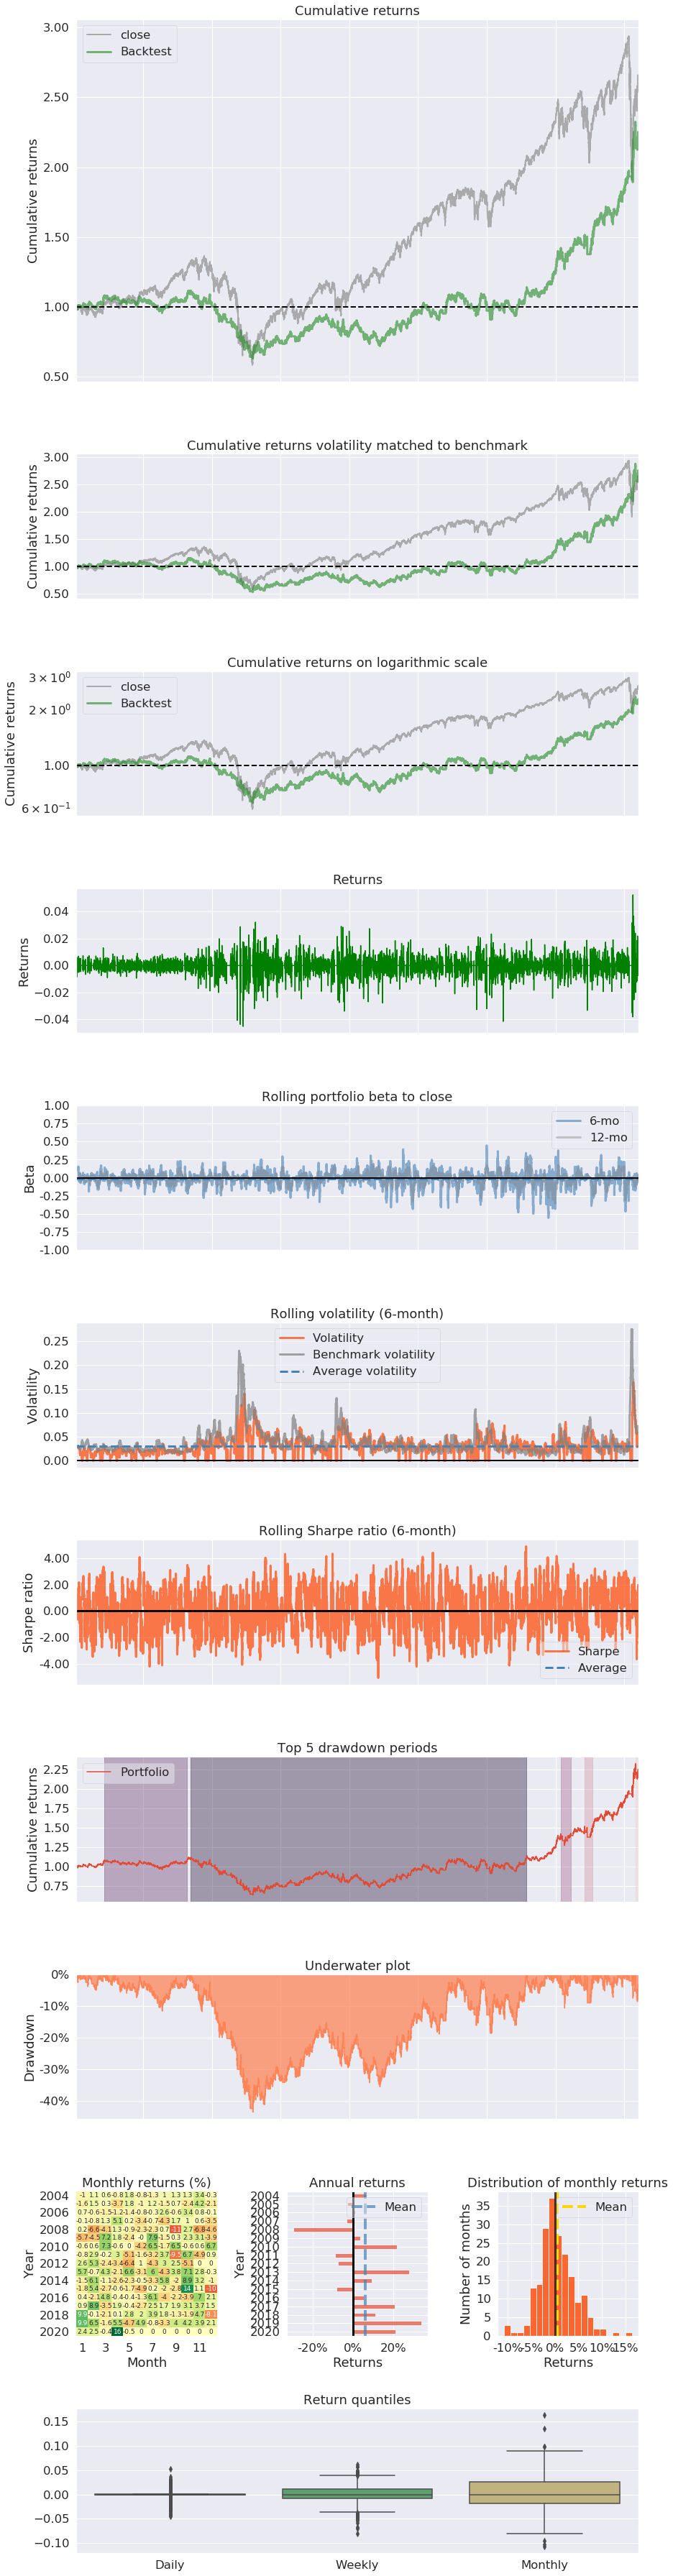

In [16]:
import numpy as np
import pandas as pd
%matplotlib inline
print(type(tc))
def strategy(tc,n_bars=100, n_side_bars=100, std_times=1, draw_plot=""):
    
    sma = tc.rolling(n_bars).mean()

    bias = (tc / sma)
    ub = 1 + bias.rolling(n_side_bars).std() * std_times
    lb = 1 - bias.rolling(n_side_bars).std() * std_times
    
    buy = (bias < lb) 
    sell = (bias > ub)

    hold = pd.Series(np.nan, index=sell.index)
    hold[buy] = 0
    hold[sell] = 1
    hold = hold.ffill()

    #prc type
    #No Delay 
    #BuyandHold
    return_prc = tc.shift(-1)/tc

    #buy with Signal
    return_prc[hold==0]=1

#     retprc -= hold.diff().abs()*(0.0005)
    bh_prc = return_prc.cumprod()
    creturn_prc = return_prc.cumprod()
    
    if draw_plot=="prc":
        print("transaction times:", np.count_nonzero(hold.diff().abs()==1))
        plt.rcParams["figure.figsize"] = (20,10)
        plt.plot(bh_prc, c='blue',label="Buy & Hold")
        plt.plot(creturn_prc,c="red", label="Bias")
        plt.legend(loc='best')
        plt.show()
    ######################################################################
    #Gap type
    #No Delay 
#     returns = twii.shift(-2) - twii.shift(-1)
    returns = tc.shift(-1)-tc
    returns[hold == 0] = 0
    #No Cost
#     returns -= hold.diff().abs() * 3
    creturn = returns.cumsum()
    
    if draw_plot=="gap":
        print("transaction times:", np.count_nonzero(hold.diff().abs()==1))
        plt.rcParams["figure.figsize"] = (20,10)
        (hold*10).plot(label="hold")
        
        eq=creturn
        
        eq_relative = eq + tc[tc.index == eq.index[0]][0]
        bm_relative = tc[eq.index[0]:]

        eq_relative.plot(c="red",  label="BIAS strategy")
        bm_relative.plot(c="blue", label="Buy & Hold" )
        
#         creturn.plot(c="blue", label="BIAS strategy")
#         (tc-tc[0]).plot(c="red", label="Buy & Hold")
        plt.legend(loc='best')
        plt.show()

        eqpc = eq_relative.pct_change()
        print("eqpc", eqpc[1:].head(2))
        
#         print(type(eqpc[1:].index[0]),eqpc[1:].index[0])
#         print(eqpc[1:].index[0].strftime('%Y-%m-%d'))

        bmpc = bm_relative[1:].pct_change()
        
#         print("bmpc", bmpc.head(2))
        pf.create_returns_tear_sheet( eqpc[1:], benchmark_rets=bmpc[1:] )  #relative sharpe 0.5
        
    return creturn.dropna()[-1]

    
strategy(tc,draw_plot="gap")
# strategy(tc[1000:2000],draw_plot="prc")

In [17]:
# #Optimizatino
# vmax = 0
# for m1 in range(5, 100, 5):
#     for m2 in range(5, 100, 5):
#         v = strategy(tc,m1, m2, 1)
#         if v > vmax:
#             vmax = v
#             print(vmax, m1, m2, 1)
# print("-------------------")
# print(vmax, m1, m2, 1)

# 120.09000000000009 5 5 1
# 170.98999999999998 5 10 1
# 177.24999999999946 5 85 1
# 187.84499999999977 15 5 1
# 197.61499999999938 15 10 1
# 201.9099999999998 20 5 1
# -------------------
# 201.9099999999998 95 95 1

transaction times: 177


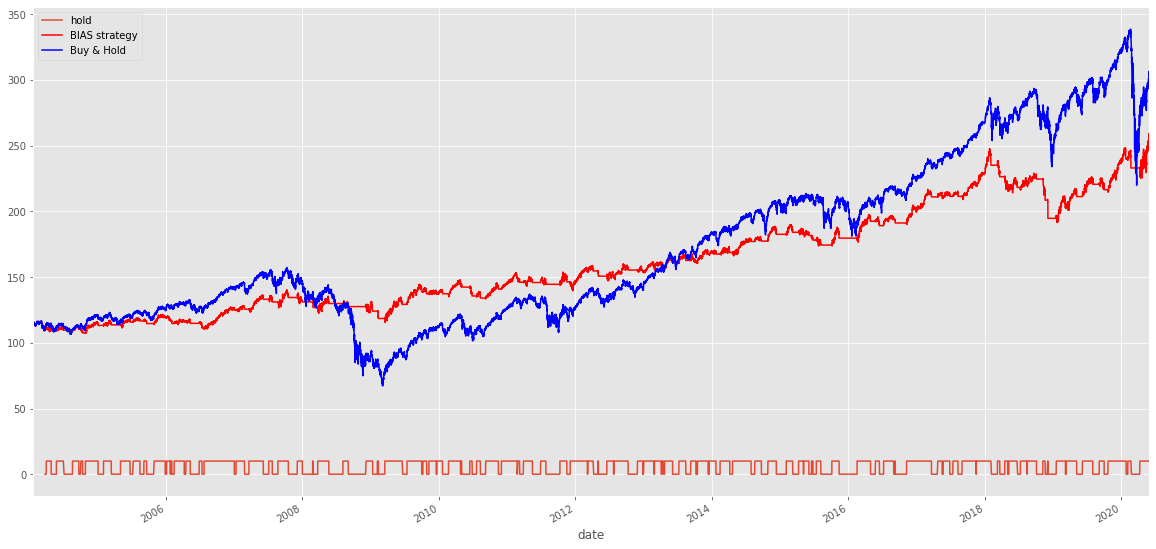

eqpc date
2004-01-23 09:00:00   -0.002862
2004-01-23 09:30:00   -0.000870
Name: close, dtype: float64


Start date,2004-01-23
End date,2020-05-29
Total months,2604
,Backtest
Annual return,0.4%
Cumulative returns,123.3%
Annual volatility,2.6%
Sharpe ratio,0.16
Calmar ratio,0.02
Stability,0.96
Max drawdown,-22.7%


/home/liaw/anaconda3/envs/finlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,22.69,2018-01-26,2019-01-23,2020-01-17,516
1,17.67,2007-10-11,2009-03-20,2009-08-24,487
2,9.85,2010-04-26,2010-09-09,2011-01-14,190
3,9.35,2020-01-22,2020-04-13,2020-05-19,85
4,9.32,2005-12-14,2006-07-27,2006-10-23,223


/home/liaw/anaconda3/envs/finlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


141.65499999999997

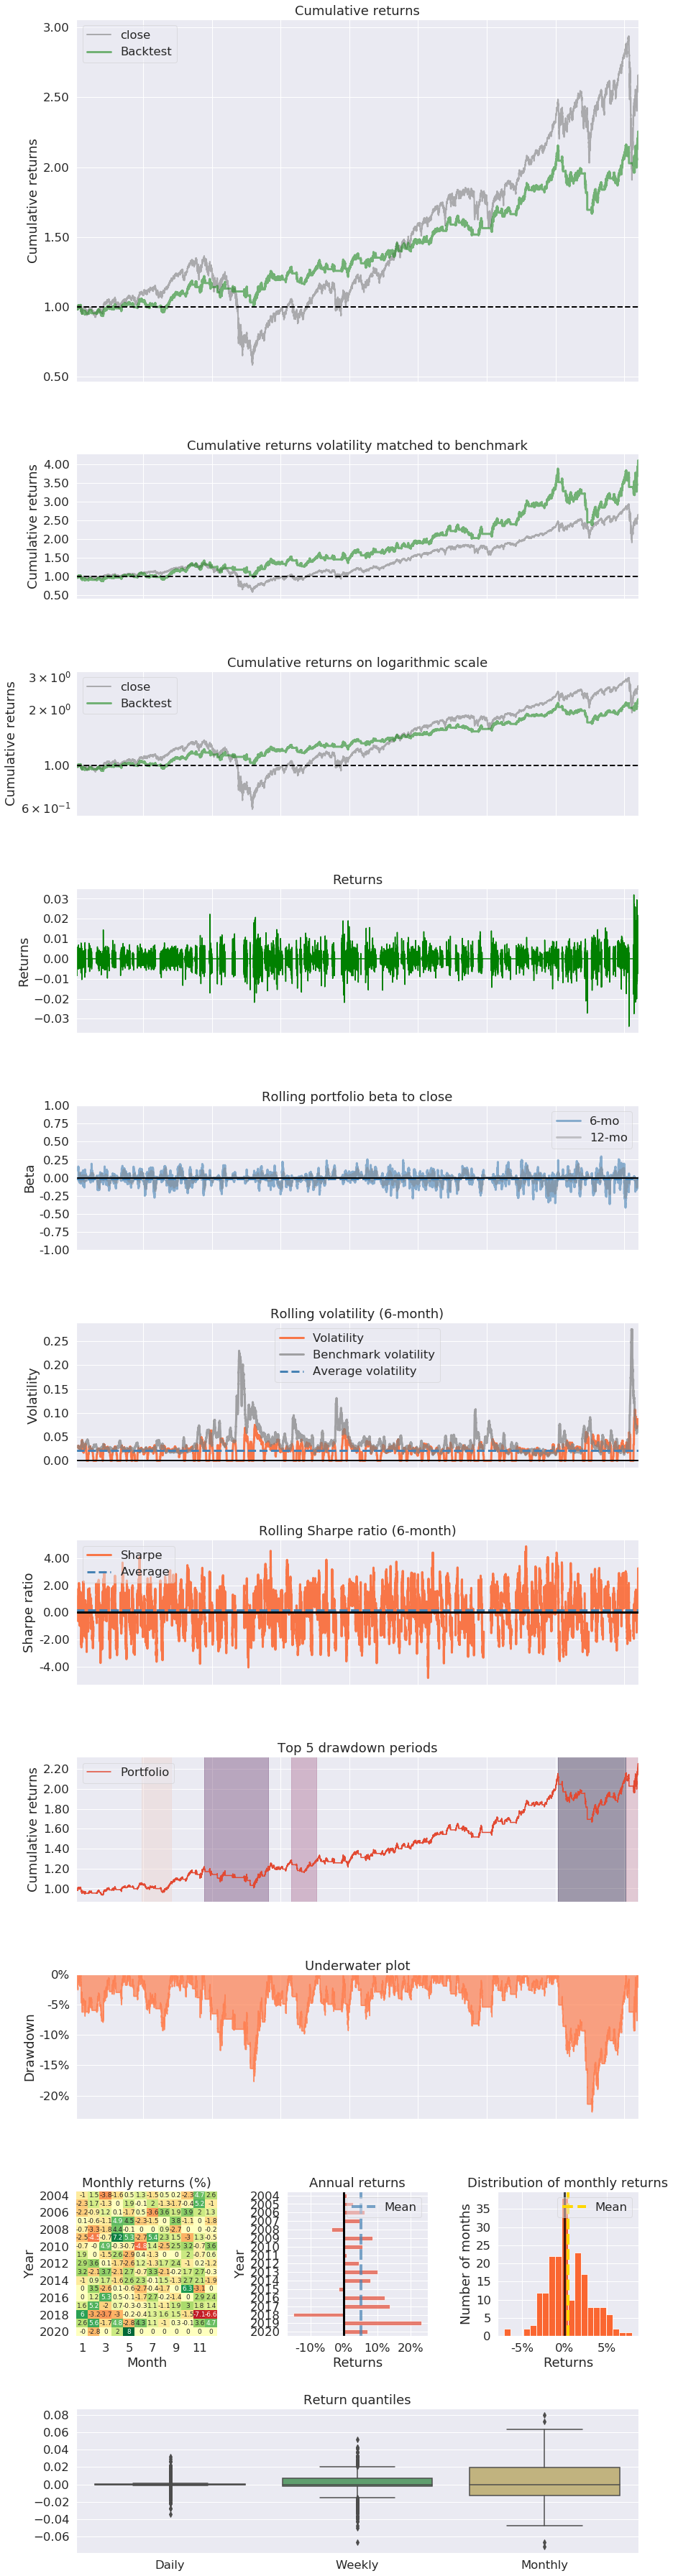

In [18]:
strategy(tc,300, 300, 1, "gap")

transaction times: 2841


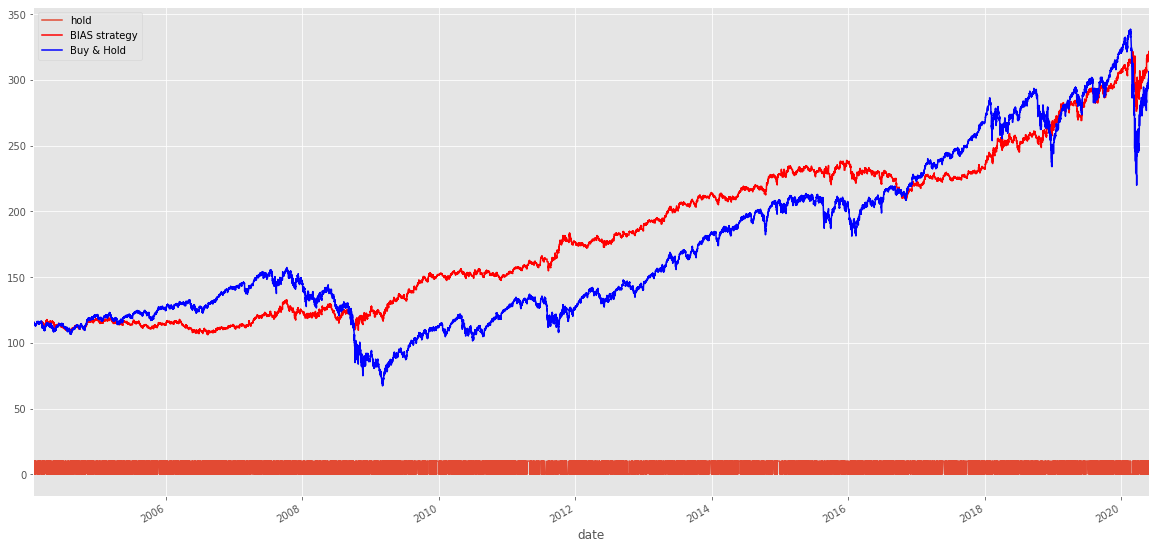

eqpc date
2004-01-23 09:00:00   -0.002862
2004-01-23 09:30:00   -0.000870
Name: close, dtype: float64


Start date,2004-01-23
End date,2020-05-29
Total months,2604
,Backtest
Annual return,0.5%
Cumulative returns,175.7%
Annual volatility,2.8%
Sharpe ratio,0.18
Calmar ratio,0.03
Stability,0.96
Max drawdown,-17.4%


/home/liaw/anaconda3/envs/finlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,17.37,2007-10-11,2008-10-27,2009-05-04,408
1,14.08,2020-03-03,2020-03-20,2020-05-28,63
2,12.52,2015-12-24,2016-11-04,2018-01-09,533
3,10.84,2005-02-25,2006-08-14,2007-04-25,563
4,7.52,2004-04-05,2004-08-12,2004-12-21,187


/home/liaw/anaconda3/envs/finlab/lib/python3.7/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return bound(*args, **kwds)


201.9099999999998

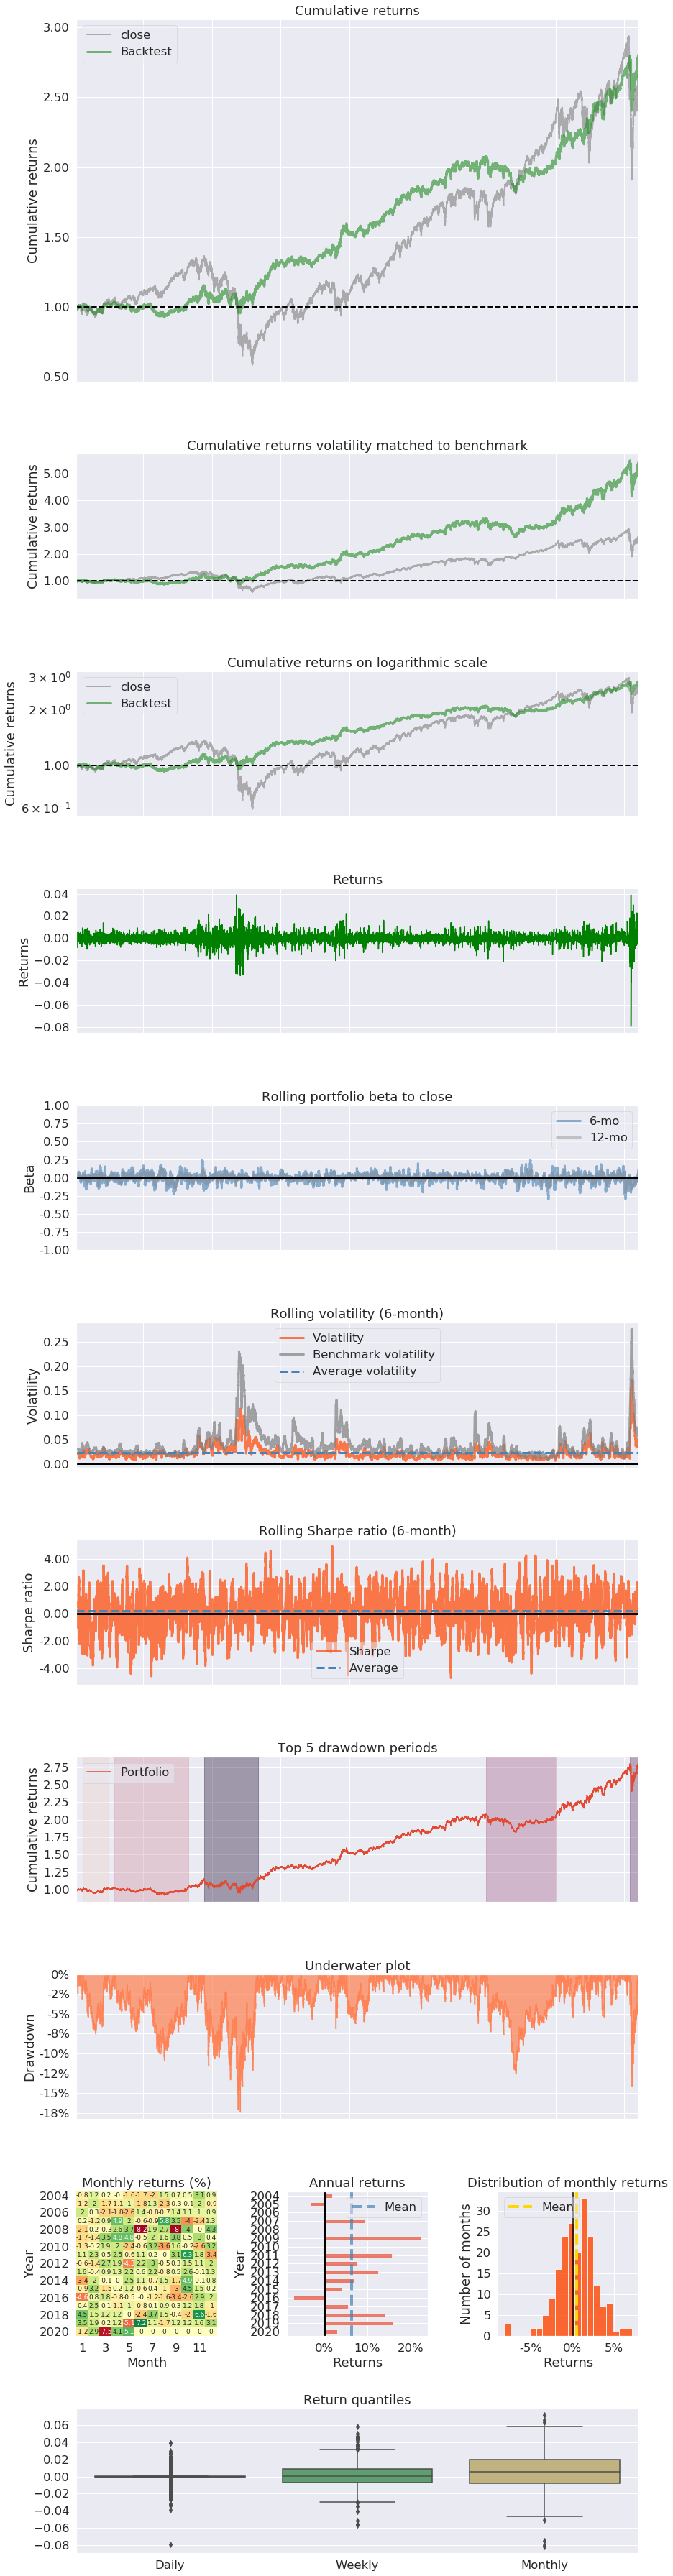

In [19]:
strategy(tc,20, 5, 1, "gap")

transaction times: 2841


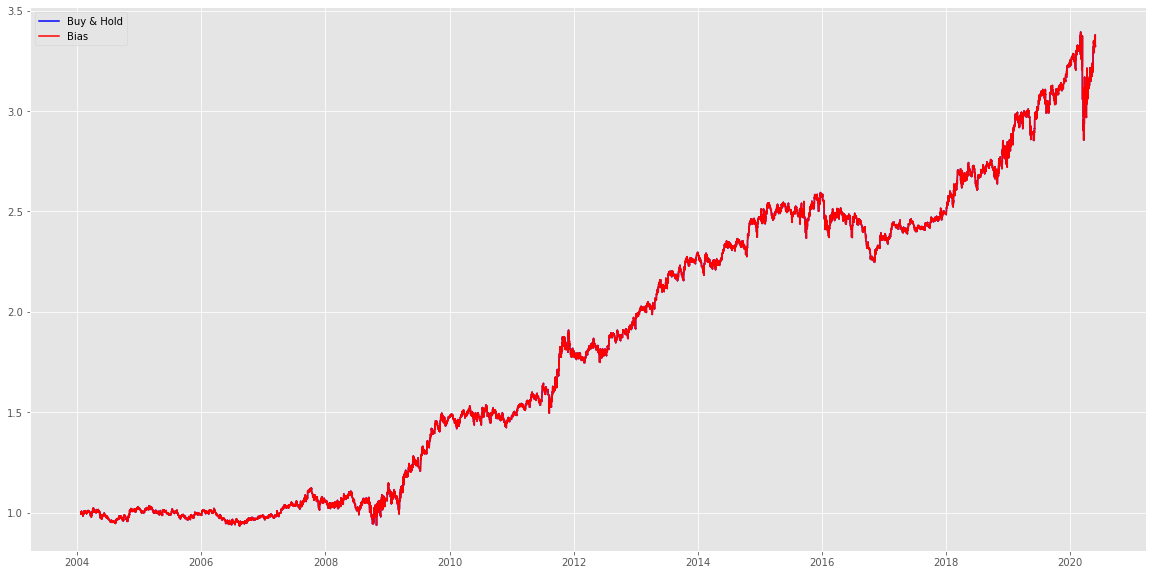

201.9099999999998

In [20]:
strategy(tc,20, 5, 1, "prc")